#### E-Commerce Data Preparation, Cleaning and Manipulation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [231]:
# Load the dataset
ecommerce_sheets_data = pd.read_excel("E-commerce_dataset.xlsx", sheet_name="data")
sheets_dict = pd.read_excel("E-commerce_dataset.xlsx", sheet_name="dictionary")

In [234]:
# Make a copy of the original dataset
sheets_data = ecommerce_sheets_data.copy()

In [235]:
sheets_data.head()

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.0,300.0
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.6,-4.0
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.0,75.5
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.0,20.0
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.0,5.5


In [236]:
sheets_dict.head(20)

,Row ID,Unique ID of the row
0,Order ID,ID of the order (one order can have multiple i...
1,Order Date,Date when order was made
2,Customer ID,ID of the customer (one customer can make mult...
3,Segment,Customer segment
4,City,Order city
5,State,Order state (where applicable)
6,Country,Order country
7,Country latitude,Geographic coordinates of the order country
8,Country longitude,Geographic coordinates of the order country
9,Region,Region to which the order belongs to


In [156]:
# Check for duplicates
sheets_data_duplicates = sheets_data.duplicated()
print(sheets_data_duplicates)

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
32       False
33       False
34       False
35       False
36       False
37       False
38       False
39       False
40       False
41       False
42       False
43       False
44       False
45       False
46       False
47       False
48       False
49       False
50       False
51       False
52       False
53       False
54       False
55       False
56       False
57       False
58       False
59       False
60       False
61       False
62       False
63       False
64       False
65       False
66       F

In [157]:
sheets_data_duplicates.value_counts()

False    51290
Name: count, dtype: int64

In [158]:
# Seeing that our data has no duplicates, we go ahead to check for null values.

In [159]:
# Checking for null values
sheets_data.isnull().sum()

Row ID               0
Order ID             0
Order Date           0
Customer ID          0
Segment              0
City                 0
State                0
Country              0
Country latitude     0
Country longitude    0
Region               0
Market               0
Subcategory          0
Category             0
Product              0
Quantity             0
Sales                0
Discount             0
Profit               0
dtype: int64

In [160]:
# No null values exist in the data.

In [161]:
sheets_data['Segment'].value_counts()

Segment
Consumer         26518
Corporate        15429
Self-Employed     9343
Name: count, dtype: int64

In [162]:
sheets_data['City'].value_counts()

City
New York City                          915
Los Angeles                            747
Philadelphia                           537
San Francisco                          510
Santo Domingo                          443
Manila                                 432
Seattle                                428
Houston                                377
Tegucigalpa                            362
Jakarta                                337
Managua                                336
Lagos                                  333
Istanbul                               314
Chicago                                314
Mexico City                            299
Bangkok                                287
London                                 281
Sydney                                 271
Cairo                                  248
Vienna                                 245
Melbourne                              235
Columbus                               222
San Salvador                           221
Berlin

In [163]:
sheets_data['State'].value_counts().iloc[:100]

State
California                             2001
England                                1499
New York                               1128
Texas                                   985
Ile-de-France                           981
New South Wales                         781
North Rhine-Westphalia                  719
Queensland                              717
San Salvador                            615
Pennsylvania                            587
National Capital                        583
Washington                              506
Illinois                                492
Victoria                                491
Ohio                                    469
Distrito Federal                        468
Santo Domingo                           443
Istanbul                                425
São Paulo                               408
Guatemala                               391
Provence-Alpes-Côte d'Azur              390
Florida                                 383
Managua                   

In [214]:
sheets_data['Country'].value_counts().sort_values(by="Country")

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

In [165]:
sheets_data['Region'].value_counts()

Region
Western Europe       5883
Central America      5616
Oceania              3487
Western US           3203
Southeastern Asia    3129
South America        2988
Eastern US           2848
Southern Asia        2655
Western Asia         2440
Eastern Asia         2374
Central US           2323
Northern Europe      2204
Southern Europe      2113
Caribbean            1690
Southern US          1620
Eastern Europe       1529
Western Africa       1460
North Africa         1278
Eastern Africa        728
Central Africa        643
Southern Africa       478
Canada                384
Central Asia          217
Name: count, dtype: int64

In [166]:
sheets_data['Market'].value_counts()

Market
Asia Pacific    14302
Europe          11729
USCA            10378
LATAM           10294
Africa           4587
Name: count, dtype: int64

In [167]:
sheets_data['Subcategory'].value_counts()

Subcategory
Nail care products              6146
shampoos and conditioners       5049
Eye shadows and pencils         4864
face moisturizing products      3492
vitamins and supplements        3434
brushes and applicators         3357
hair colors and toners          3154
Accessories                     3075
body moisturizers               2601
hand creams                     2601
foundations and concealers      2411
face masks and exfoliators      2407
bath oils, bubbles and soaks    2387
candles, sprays, diffusers      2223
Lipsticks                       1742
Body soaps and washes           1486
fragrances                       861
Name: count, dtype: int64

In [168]:
sheets_data['Category'].value_counts()

Category
Body care               21062
Home and Accessories     9516
Make up                  9017
Hair care                8203
Face care                3492
Name: count, dtype: int64

In [169]:
sheets_data['Product'].value_counts()

Product
Herbal Essences Bio                                                                     335
Neutrogena Hydro Boost Gel Cream                                                        227
Essie Nail Polish Aruba Blue Shimmering Cobalt                                           92
Head & Shoulders Classic Clean Conditioner                                               90
Redken Color Extend Magnetics Conditioner                                                84
Revlon Nail Enamel Rich Raspberry Berry Pink                                             83
L'Oréal Infallible 24HR Eyeshadow Bronzed Taupe                                          80
TRESemmé Moisture Rich Conditioner                                                       77
Revlon Nail Enamel Elegant Nude Beige                                                    75
NYX Hot Singles Eyeshadow Chandelier Warm Peach                                          75
Dove Nutritive Solutions Oxygen Moisture Shampoo                        

In [170]:
sheets_data.head(30)

,Row ID,Order ID,Order Date,Customer ID,Segment,City,State,Country,Country latitude,Country longitude,Region,Market,Subcategory,Category,Product,Quantity,Sales,Discount,Profit
0,46682,IZ-2012-LW699061-40911,2020-01-03,LW-699061,Corporate,Mosul,Ninawa,Iraq,33.223191,43.679291,Western Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,Head & Shoulders Classic Clean Shampoo,20,600,0.00,300.00
1,10124,US-2012-BT1130518-40912,2020-01-04,BT-1130518,Self-Employed,Pilar,Alagoas,Brazil,-14.235004,-51.925280,South America,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Ultra Facial Overnight Hydrating Masque,2,40,0.60,-4.00
2,9067,MX-2012-AW1093031-40912,2020-01-04,AW-1093031,Self-Employed,Santiago de Cuba,Santiago de Cuba,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Golden Vine Bracelet,1,151,0.00,75.50
3,130,MX-2012-BT1130531-40912,2020-01-04,BT-1130531,Self-Employed,Manzanillo,Granma,Cuba,21.521757,-77.781167,Caribbean,LATAM,"bath oils, bubbles and soaks",Body care,Kiehl's Crème de Corps Smoothing Oil-to-Foam B...,4,40,0.00,20.00
4,24072,IN-2012-KM1666027-40914,2020-01-06,KM-1666027,Consumer,Huadian,Jilin,China,35.861660,104.195397,Eastern Asia,Asia Pacific,"bath oils, bubbles and soaks",Body care,NARS Single Eyeshadow Sophia Cool Brown,1,11,0.00,5.50
5,48227,HU-2012-ER385557-40918,2020-01-10,ER-385557,Corporate,Budapest,Budapest,Hungary,47.162494,19.503304,Eastern Europe,Europe,"bath oils, bubbles and soaks",Body care,Nature's Bounty B-Complex,8,352,0.00,176.00
6,31055,ID-2012-TN2104092-40919,2020-01-11,TN-2104092,Self-Employed,Dunedin,Otago,New Zealand,-40.900557,174.885971,Oceania,Asia Pacific,"bath oils, bubbles and soaks",Body care,Voluspa Santal 26 Candle,2,36,0.40,3.60
7,1883,MX-2012-TB2105582-40922,2020-01-14,TB-2105582,Consumer,Tijuana,Baja California,Mexico,23.634501,-102.552784,Central America,LATAM,"bath oils, bubbles and soaks",Body care,Aveda Stress-Fix Bath Soak,4,52,0.00,26.00
8,32061,CA-2012-CS12250140-40922,2020-01-14,CS-122501408,Corporate,Bossier City,Louisiana,United States,37.090240,-95.712891,Southern US,USCA,"bath oils, bubbles and soaks",Body care,WoodWick Volcano Candle,14,224,0.00,112.00
9,12393,ES-2012-AB1060064-40927,2020-01-19,AB-1060064,Corporate,Sesto San Giovanni,Lombardy,Italy,41.871940,12.567380,Southern Europe,Europe,"bath oils, bubbles and soaks",Body care,MAC 217 Blending Brush,16,192,0.00,96.00


In [171]:
# Standardize the date column
sheets_data['Order Date'] = pd.to_datetime(sheets_data['Order Date'])


sheets_data['Order Date'].value_counts()

Order Date
2023-06-18    135
2023-11-18    127
2023-09-03    126
2023-11-20    118
2023-12-29    116
2023-11-13    114
2023-12-10    114
2023-12-26    110
2022-09-20    109
2021-11-13    106
2023-09-25    104
2023-11-12    103
2023-11-28    103
2023-11-25    103
2022-06-13    102
2022-11-11    102
2023-12-19    101
2023-12-03    101
2023-09-26    100
2023-11-04    100
2023-10-22     99
2023-12-23     99
2023-06-30     99
2023-11-21     97
2023-11-27     96
2023-12-04     96
2023-12-09     96
2023-11-19     96
2023-11-17     95
2023-09-23     95
2023-11-26     95
2022-09-25     95
2023-06-11     94
2023-12-02     94
2023-08-22     93
2023-09-17     93
2023-11-06     92
2023-09-05     92
2022-08-16     92
2023-11-14     91
2023-09-12     90
2023-05-08     90
2023-09-16     89
2022-06-07     89
2022-11-28     89
2023-09-18     88
2022-12-20     88
2021-11-08     88
2023-11-07     87
2022-11-06     87
2022-09-06     87
2023-06-23     86
2023-08-28     86
2023-12-12     85
2023-12-11     85

#### Exploratory Data Analysis

In [216]:
sheets_data.describe()

,Row ID,Order Date,Country latitude,Country longitude,Quantity,Sales,Discount,Profit,Order Year
count,51290.00000,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2022-05-11 21:26:49.155780608,24.506298,-4.585665,5.415832,127.074946,0.142908,20.772346,2021.777208
min,1.00000,2020-01-01 00:00:00,-40.900557,-106.346771,1.000000,2.000000,0.000000,-1746.000000,2020.000000
25%,12823.25000,2021-06-19 00:00:00,12.879721,-95.712891,2.000000,25.000000,0.000000,0.000000,2021.000000
50%,25645.50000,2022-07-08 00:00:00,35.861660,2.213749,4.000000,56.000000,0.000000,7.200000,2022.000000
75%,38467.75000,2023-05-22 00:00:00,38.963745,43.679291,7.000000,132.000000,0.200000,25.000000,2023.000000
max,51290.00000,2023-12-31 00:00:00,61.924110,174.885971,20.000000,3940.000000,0.850000,1820.000000,2023.000000
std,14806.29199,NaN,24.119393,80.298692,4.908234,236.074764,0.212280,83.582680,1.098931


In [172]:
# Checking the Profit by Category
sheets_data[["Profit", "Category"]].groupby(["Category"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Category,
Body care,590907.78
Make up,368998.18
Face care,159018.10
Hair care,3677.23
Home and Accessories,-57187.64


In [173]:
# Checking the Profit by Subcategory
sheets_data[["Profit", "Subcategory"]].groupby(["Subcategory"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Subcategory,
Nail care products,223684.09
Eye shadows and pencils,203809.91
face moisturizing products,159018.10
vitamins and supplements,135023.12
hand creams,113138.41
"bath oils, bubbles and soaks",99583.15
foundations and concealers,97773.45
Lipsticks,67414.82
Body soaps and washes,47532.83


In [215]:
# Checking the Profit by Top 10 Product
profit_by_product = sheets_data[["Profit", "Product"]].groupby(["Product"]).sum().sort_values(by="Profit", ascending=False).round(2)

profit_by_product.head(10)

,Profit
Product,
Herbal Essences Bio,9089.68
Rose Gold Petal Studs,7400.67
Sterling Frost Earrings,6071.38
Gold Spectrum Anklet,5942.76
Golden Vine Bracelet,5741.93
Sterling Wave Earrings,5583.60
Golden Feather Earrings,5508.06
Emerald Crown Necklace,5125.48
Sterling Crown Anklet,4675.65


In [175]:
# Calculate mean and standard deviation
category_stats = sheets_data.groupby("Category")[["Sales", "Profit", "Discount"]].agg(["mean", "std"]).round(2).reset_index()
print(category_stats)

               Category   Sales         Profit        Discount      
                           mean     std   mean    std     mean   std
0             Body care  127.38  234.57  28.06  89.71     0.15  0.23
1             Face care  127.64  223.14  45.54  87.89     0.11  0.18
2             Hair care  124.61  238.69   0.45  57.76     0.14  0.20
3  Home and Accessories  130.90  240.07  -6.01  57.41     0.14  0.20
4               Make up  124.35  237.79  40.92  97.65     0.13  0.21


In [176]:
# Checking the Profit by Region
sheets_data[["Profit", "Region"]].groupby(["Region"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Region,
Western Europe,171513.30
Central America,139019.04
Eastern Asia,86461.70
Western US,86223.90
Southern Asia,84910.95
Oceania,68887.15
Southern Europe,65051.85
Eastern US,63428.25
Eastern Europe,52954.45


In [223]:
# Checking the Profit by Country
sheets_data[["Profit", "Country"]].groupby(["Country"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Country,
United States,207879.42
France,93483.10
Mexico,79893.79
China,76479.30
Germany,63342.10
...,...
Argentina,-6794.70
Netherlands,-8413.20
Honduras,-12451.70


In [222]:
# Checking the Profit by Market
sheets_data[["Profit", "Market"]].groupby(["Market"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Market,
Europe,331644.70
Asia Pacific,228742.59
USCA,222770.12
LATAM,216042.79
Africa,66213.45


In [179]:
# Checking the Profit by Segment
sheets_data[["Profit", "Segment"]].groupby(["Segment"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Segment,
Corporate,608523.33
Consumer,365377.60
Self-Employed,91512.72


In [221]:
# Checking the Profit by Date
sheets_data[["Profit", "Order Date"]].groupby(["Order Date"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Order Date,
2023-08-28,4891.91
2021-12-19,4404.85
2021-11-13,4341.54
2022-06-11,4204.97
2021-06-08,4144.33
...,...
2023-12-24,-1053.75
2021-07-13,-1127.15
2023-10-03,-1333.54


In [220]:
# Checking the Profit by Year
sheets_data["Order Year"] = sheets_data["Order Date"].dt.year
 
sheets_data[["Profit", "Order Year"]].groupby(["Order Year"]).sum().sort_values(by="Profit", ascending=False).round(2)

,Profit
Order Year,
2022,318671.89
2023,279928.68
2021,259696.96
2020,207116.12


In [182]:
# Checking the Sales by Category
sheets_data[["Sales", "Category"]].groupby(["Category"]).sum().sort_values(by="Sales", ascending=False)

,Sales
Category,
Body care,2682942
Home and Accessories,1245643
Make up,1121222
Hair care,1022151
Face care,445716


In [183]:
# Checking the Sales by Subcategory
sheets_data[["Sales", "Subcategory"]].groupby(["Subcategory"]).sum().sort_values(by="Sales", ascending=False)

,Sales
Subcategory,
Nail care products,787587
shampoos and conditioners,618967
Eye shadows and pencils,604511
brushes and applicators,447605
vitamins and supplements,445877
face moisturizing products,445716
hair colors and toners,403184
Accessories,396608
body moisturizers,340944


In [184]:
# Checking the Sales by Product
sales_by_product = sheets_data[["Sales", "Product"]].groupby(["Product"]).sum().sort_values(by="Sales", ascending=False)

sales_by_product.head(10)

,Sales
Product,
Herbal Essences Bio,67640
Rose Gold Petal Studs,29987
Sterling Wave Earrings,29520
Golden Blaze Necklace,28564
Sterling Solstice Anklet,28552
Gold Spectrum Anklet,27004
Sterling Frost Ring,26772
Silver Mirage Necklace,26226
Silver Glimmer Necklace,25088


In [185]:
# Checking the Sales by Region
sheets_data[["Sales", "Region"]].groupby(["Region"]).sum().sort_values(by="Sales", ascending=False)

,Sales
Region,
Western Europe,762855
Central America,729231
Oceania,454304
Western US,444113
Southeastern Asia,423768
South America,388179
Eastern US,379999
Southern Asia,329088
Eastern Asia,326237


In [224]:
# Checking the Sales by Country
sheets_data[["Sales", "Country"]].groupby(["Country"]).sum().sort_values(by="Sales", ascending=False)

,Sales
Country,
United States,1326577
Australia,381404
France,374791
Mexico,336145
Germany,257059
...,...
Equatorial Guinea,42
Luxembourg,38
Suriname,36


In [187]:
# Checking the Sales by Market
sheets_data[["Sales", "Market"]].groupby(["Market"]).sum().sort_values(by="Sales", ascending=False)

,Sales
Market,
Asia Pacific,1831648
Europe,1487444
USCA,1372045
LATAM,1339726
Africa,486811


In [188]:
# Checking the Sales by Segment
sheets_data[["Sales", "Segment"]].groupby(["Segment"]).sum().sort_values(by="Sales", ascending=False)

,Sales
Segment,
Corporate,3840707
Consumer,2146780
Self-Employed,530187


In [189]:
# Checking the Sales by Year
sheets_data["Order Year"] = sheets_data["Order Date"].dt.year

sheets_data[["Order Year", "Sales"]].groupby("Order Year").sum().sort_values(by="Sales", ascending=False)

,Sales
Order Year,
2023,2192647
2022,1770790
2021,1405876
2020,1148361


In [190]:
# Checking the Discount by Category
sheets_data[["Discount", "Category"]].groupby(["Category"]).sum().sort_values(by="Discount", ascending=False).round(2)

,Discount
Category,
Body care,3209.74
Home and Accessories,1370.83
Make up,1190.09
Hair care,1174.57
Face care,384.50


In [191]:
# Checking the Discount by Subcategory
sheets_data[["Discount", "Subcategory"]].groupby(["Subcategory"]).sum().sort_values(by="Discount", ascending=False).round(2)

,Discount
Subcategory,
Nail care products,1101.88
shampoos and conditioners,699.49
Eye shadows and pencils,571.88
vitamins and supplements,560.12
brushes and applicators,489.61
hair colors and toners,475.08
face moisturizing products,384.50
foundations and concealers,370.71
Accessories,370.48


In [192]:
# Checking the Average Discount by Product
average_discount_by_product = sheets_data[["Discount", "Product"]].groupby(["Product"]).mean().sort_values(by="Discount", ascending=False).round(2)

average_discount_by_product.head(10)

,Discount
Product,
Kiehl's Dermatologist Solutions Powerful Strength Line-Reducing Concentrate,0.70
CeraVe Itch Relief Moisturizing Cream,0.70
Neutrogena Clear Face Oil-Free Sunscreen SPF 50,0.70
Pantene Pro-V Nature Fusion Smoothing Conditioner,0.70
Ruby Horizon Bracelet,0.65
Dr. Teal's Soothe & Sleep Lavender Foaming Bath,0.65
Weleda Evening Primrose Age Revitalizing Hand Cream,0.60
Golden Flora Brooch,0.60
Aveeno Absolutely Ageless Intensive Renewal Serum,0.60


In [193]:
# Checking the Discount by Region
sheets_data[["Discount","Region"]].groupby(["Region"]).sum().sort_values(by="Discount", ascending=False).round(2)

,Discount
Region,
Western Asia,860.80
Southeastern Asia,851.33
Western Africa,633.50
Central America,616.45
Central US,558.34
South America,549.29
Oceania,534.10
Western Europe,531.75
Eastern US,414.00


In [225]:
# Checking the Discount by Country
sheets_data[["Discount","Country"]].groupby(["Country"]).sum().sort_values(by="Discount", ascending=False).round(2)

,Discount
Country,
United States,1561.09
Turkey,826.80
Nigeria,633.50
Indonesia,413.26
Australia,407.20
...,...
Tunisia,0.00
Ukraine,0.00
Uzbekistan,0.00


In [195]:
# Checking the Discount by Market
sheets_data[["Discount", "Market"]].groupby(["Market"]).sum().sort_values(by="Discount", ascending=False).round(2)

,Discount
Market,
Asia Pacific,2588.63
USCA,1561.09
LATAM,1395.16
Europe,1066.05
Africa,718.80


In [196]:
# Checking the Discount by Segment
sheets_data[["Discount", "Segment"]].groupby(["Segment"]).sum().sort_values(by="Discount", ascending=False).round(2)

,Discount
Segment,
Consumer,3808.04
Corporate,2205.28
Self-Employed,1316.40


In [197]:
# Checking the Discount by Year
sheets_data["Order Year"] = sheets_data["Order Date"].dt.year

sheets_data[["Order Year", "Discount"]].groupby("Order Year").sum().sort_values(by="Discount", ascending=False)

,Discount
Order Year,
2023,2512.038
2022,1935.522
2021,1548.774
2020,1333.394


#### Data Visualization and Analysis

In [198]:
# Analyze the Sales, profit and discount by Category

category_analysis = sheets_data.groupby("Category")[["Sales","Profit", "Discount"]].sum().sort_values(by=["Sales", "Profit", "Discount"], ascending=[False, False, False]).reset_index()

print(category_analysis)

               Category    Sales     Profit  Discount
0             Body care  2682942  590907.78  3209.740
1  Home and Accessories  1245643  -57187.64  1370.828
2               Make up  1121222  368998.18  1190.090
3             Hair care  1022151    3677.23  1174.570
4             Face care   445716  159018.10   384.500


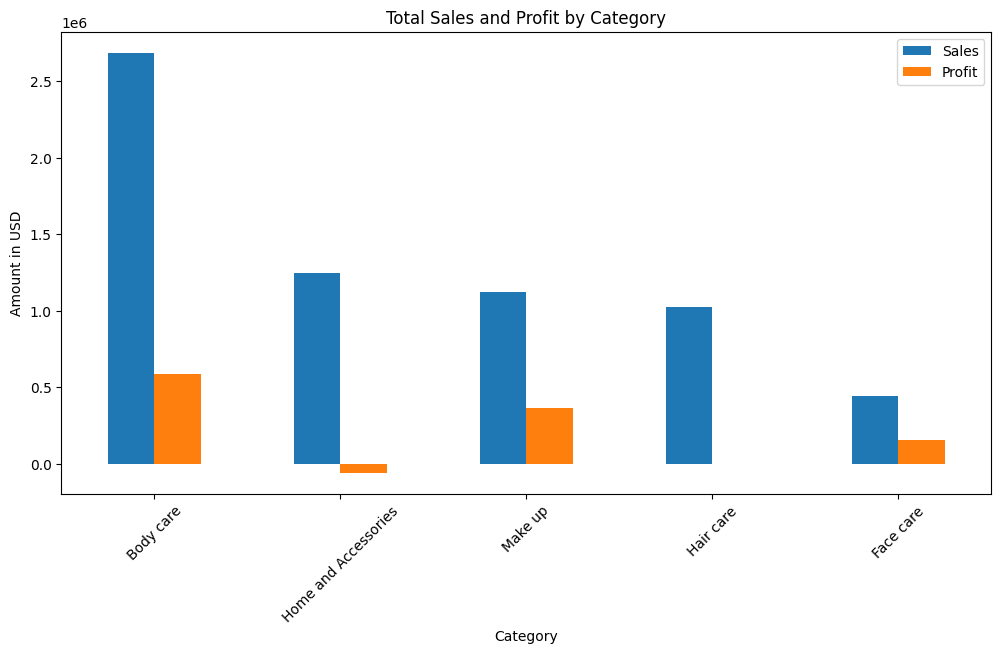

In [199]:
# Visualize sales and profit by Category

category_sales_profit = sheets_data.groupby("Category")[["Sales","Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

category_sales_profit.plot(x="Category", kind="bar", stacked=False, figsize=(12,6))

plt.title("Total Sales and Profit by Category")
plt.ylabel("Amount in USD")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.show()

In [200]:
# Analyze the Sales, profit and discount by Subcategory

subcategory_analysis = sheets_data.groupby("Subcategory")[["Sales","Profit", "Discount"]].sum().sort_values(by=["Sales", "Profit", "Discount"], ascending=[False, False, False]).reset_index()

print(subcategory_analysis)

                     Subcategory   Sales     Profit  Discount
0             Nail care products  787587  223684.09  1101.880
1      shampoos and conditioners  618967    3124.52   699.490
2        Eye shadows and pencils  604511  203809.91   571.880
3        brushes and applicators  447605  -21710.61   489.610
4       vitamins and supplements  445877  135023.12   560.120
5     face moisturizing products  445716  159018.10   384.500
6         hair colors and toners  403184     552.71   475.080
7                    Accessories  396608   -4099.50   370.480
8              body moisturizers  340944  -18237.92   356.840
9                    hand creams  338474  113138.41   313.490
10    face masks and exfoliators  314972   -9815.90   308.200
11    foundations and concealers  304944   97773.45   370.710
12  bath oils, bubbles and soaks  295340   99583.15   317.210
13    candles, sprays, diffusers  277899   -4637.41   260.418
14                     Lipsticks  211767   67414.82   247.500
15      

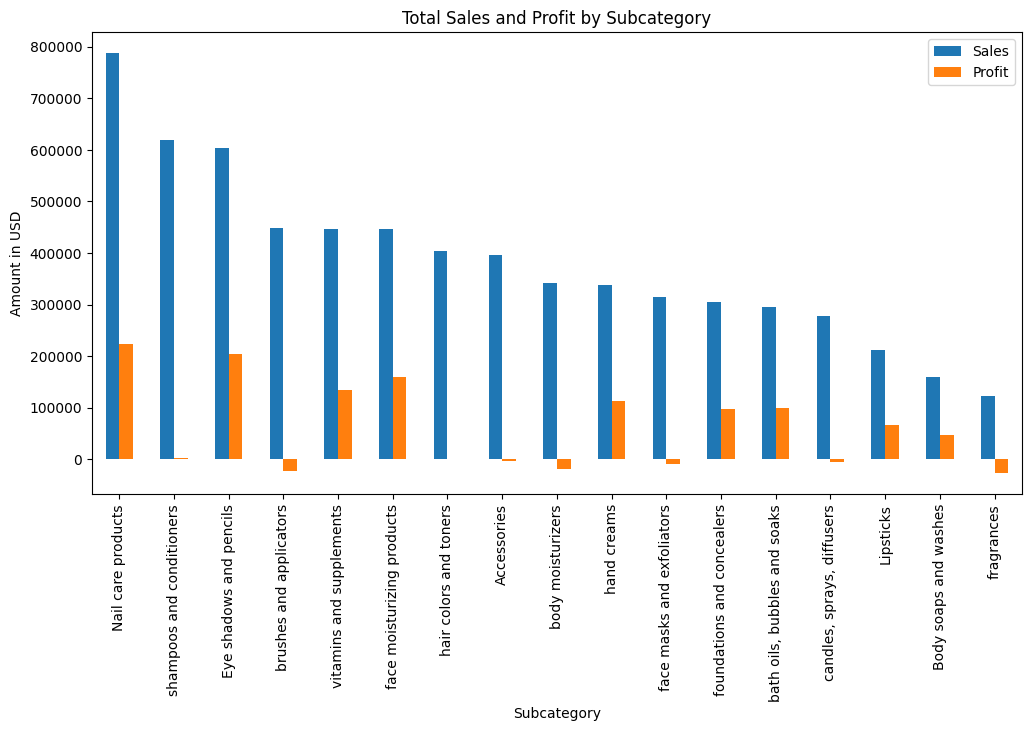

In [201]:
# Visualize sales and profit by Subcategory

subcategory_sales_profit = sheets_data.groupby("Subcategory")[["Sales","Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

subcategory_sales_profit.plot(x="Subcategory", kind="bar", stacked=False, figsize=(12,6))

plt.title("Total Sales and Profit by Subcategory")
plt.ylabel("Amount in USD")
plt.xlabel("Subcategory")
plt.xticks(rotation=90)
plt.show()

In [202]:
# Analyze the Sales, profit and discount by Product

product_analysis = sheets_data.groupby("Product")[["Sales","Profit", "Discount"]].sum().sort_values(by=["Sales", "Profit", "Discount"], ascending=[False, False, False]).reset_index()

print(product_analysis.head(10))

                     Product  Sales    Profit  Discount
0        Herbal Essences Bio  67640  9089.676    51.396
1      Rose Gold Petal Studs  29987  7400.666     2.942
2     Sterling Wave Earrings  29520  5583.600     5.040
3      Golden Blaze Necklace  28564  3091.860     2.270
4   Sterling Solstice Anklet  28552  2048.520     3.470
5       Gold Spectrum Anklet  27004  5942.764     4.972
6        Sterling Frost Ring  26772  -539.320     3.740
7     Silver Mirage Necklace  26226  4485.948     6.542
8    Silver Glimmer Necklace  25088  3884.720     3.220
9  Sterling Whisper Bracelet  24883  3550.420     4.370


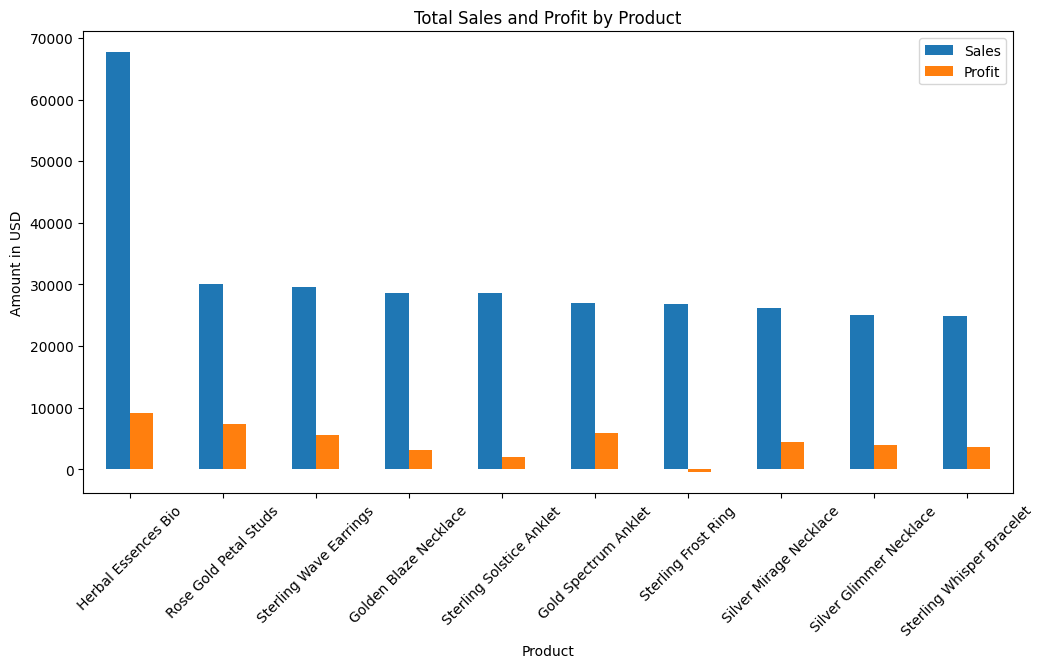

In [203]:
# Visualize sales and profit by Product

product_sales_profit = sheets_data.groupby("Product")[["Sales","Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

product_sales_profit.head(10).plot(x="Product", kind="bar", stacked=False, figsize=(12,6))

plt.title("Total Sales and Profit by Product")
plt.ylabel("Amount in USD")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.show()

In [204]:
# Analyze Sales and Profit across Customer Segments

segment_analysis = sheets_data.groupby("Segment")[["Sales", "Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

print(segment_analysis)

         Segment    Sales      Profit
0      Corporate  3840707  608523.326
1       Consumer  2146780  365377.602
2  Self-Employed   530187   91512.722


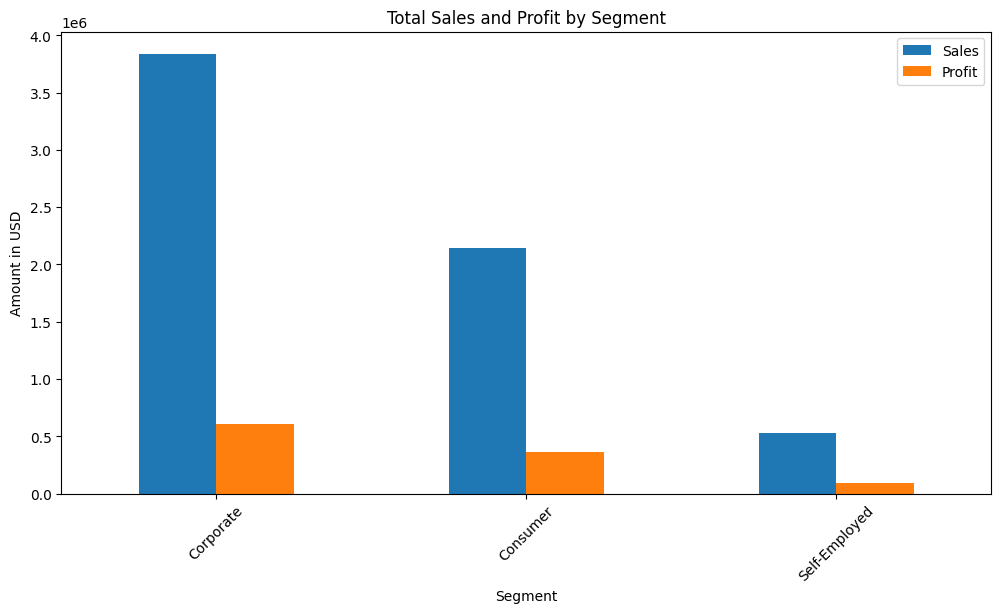

In [205]:
# Visualize sales and profit by Customer Segment

segment_sales_profit = sheets_data.groupby("Segment")[["Sales","Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

segment_sales_profit.plot(x="Segment", kind="bar", stacked=False, figsize=(12,6))

plt.title("Total Sales and Profit by Segment")
plt.ylabel("Amount in USD")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.show()

In [206]:
# Analyse Sales and Profit across Region and Country
region_sales_profit = sheets_data.groupby("Region")[["Sales", "Profit"]].sum().reset_index()
country_sales_profit = sheets_data.groupby("Country")[["Sales", "Profit"]].sum().reset_index()

print(region_sales_profit.head(10))


            Region   Sales      Profit
0           Canada   45468   14890.700
1        Caribbean  222316   35426.684
2   Central Africa   68211   20909.350
3  Central America  729231  139019.038
4     Central Asia   22797   -4029.800
5       Central US  291250   23920.770
6   Eastern Africa   87233   15526.650
7     Eastern Asia  326237   86461.700
8   Eastern Europe  165257   52954.450
9       Eastern US  379999   63428.250


In [207]:
print(country_sales_profit.head(10))

       Country   Sales     Profit
0  Afghanistan    8509   2456.700
1      Albania    5403   2433.800
2      Algeria   15023   5382.250
3       Angola   11886   3927.050
4    Argentina   55989  -6794.698
5      Armenia      34     15.600
6    Australia  381404  61833.000
7      Austria   42762  13077.700
8   Azerbaijan    3533    975.200
9      Bahrain     732    106.800


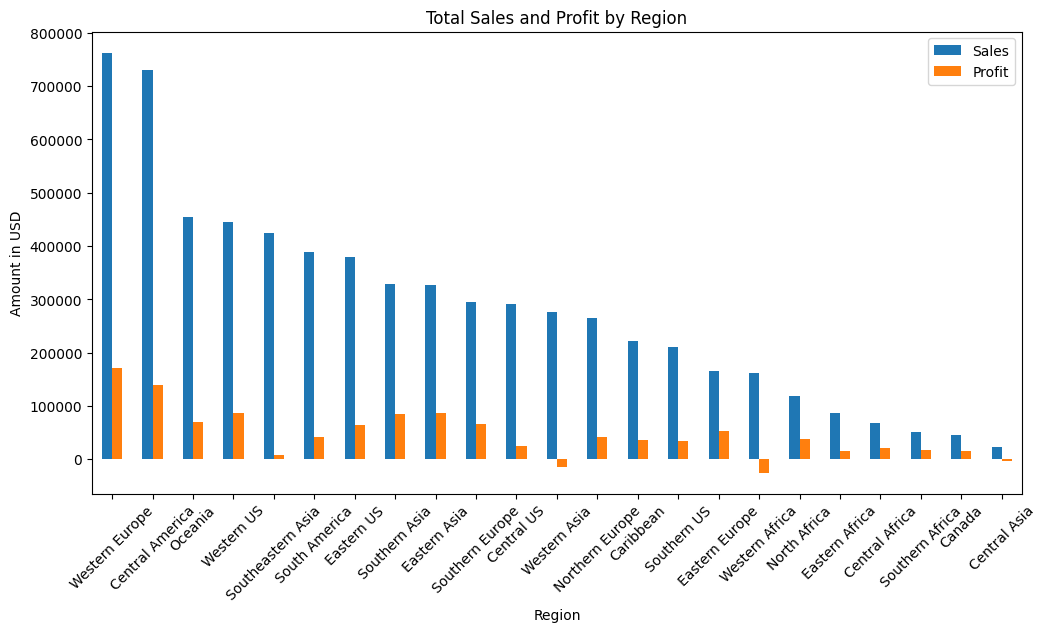

In [208]:
# Visualize sales and profit by Region

region_sales_profit = sheets_data.groupby("Region")[["Sales","Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

region_sales_profit.plot(x="Region", kind="bar", stacked=False, figsize=(12,6))

plt.title("Total Sales and Profit by Region")
plt.ylabel("Amount in USD")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.show()

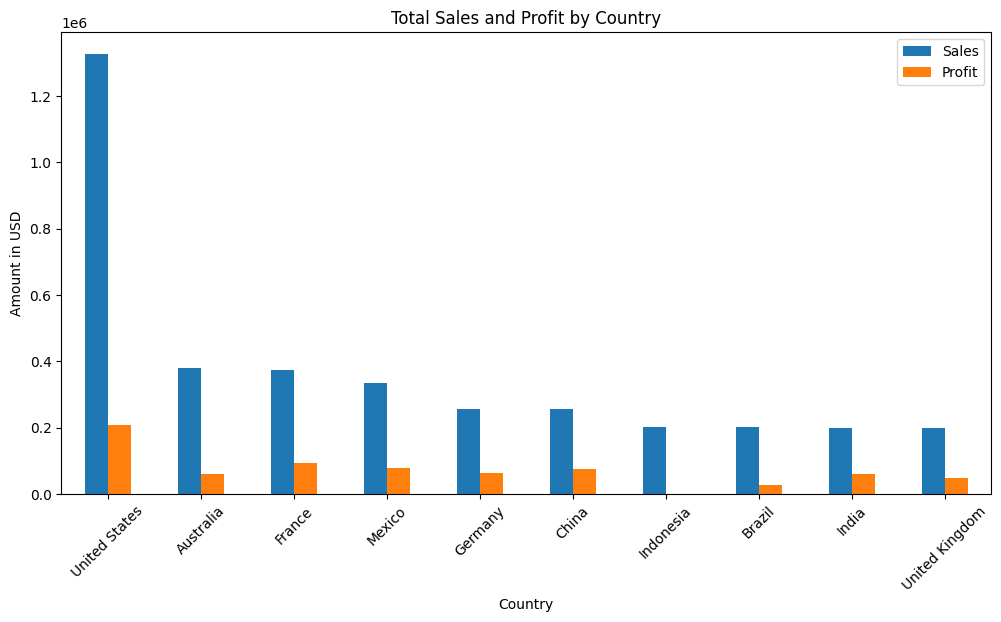

In [209]:
# Visualize sales and profit by Country

country_sales_profit = sheets_data.groupby("Country")[["Sales","Profit"]].sum().sort_values(by=["Sales", "Profit"], ascending=[False, False]).reset_index()

country_sales_profit.head(10).plot(x="Country", kind="bar", stacked=False, figsize=(12,6))

plt.title("Total Sales and Profit by Country")
plt.ylabel("Amount in USD")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

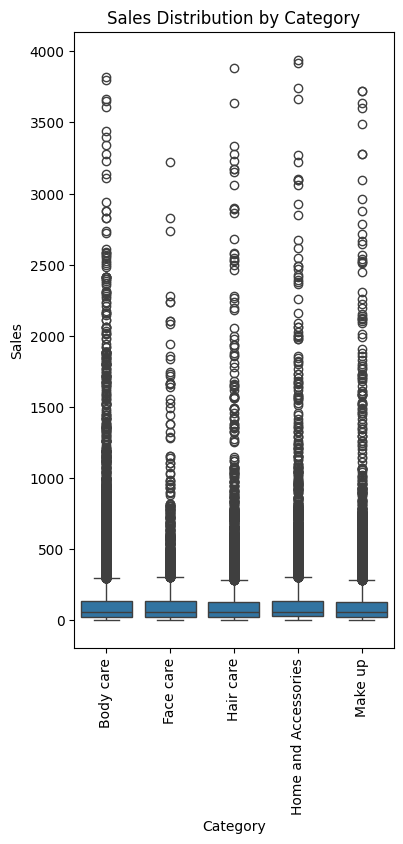

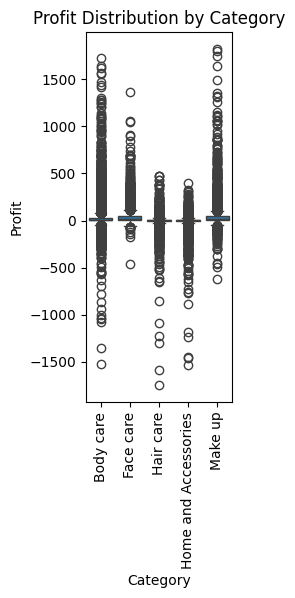

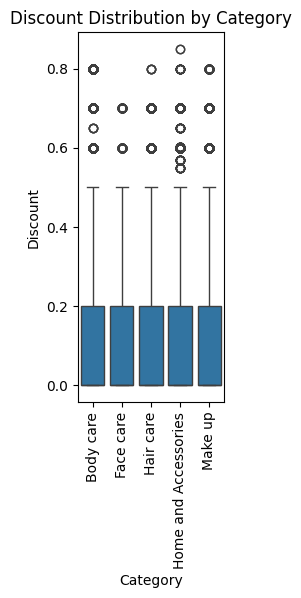

In [210]:
# Box Plot for Sales

plt.figure(figsize=(14,8))

# For Sales
plt.subplot(1,3,1)
sns.boxplot(x="Category", y="Sales", data=sheets_data)
plt.title("Sales Distribution by Category")
plt.xticks(rotation=90)
plt.show()

# For Profit
plt.subplot(1,3,1)
sns.boxplot(x="Category", y="Profit", data=sheets_data)
plt.title("Profit Distribution by Category")
plt.xticks(rotation=90)
plt.show()

# For Discount
plt.subplot(1,3,1)
sns.boxplot(x="Category", y="Discount", data=sheets_data)
plt.title("Discount Distribution by Category")
plt.xticks(rotation=90)

# plt.tight_layout()
plt.show()

In [211]:
# We can see the dispersion range of the data in the dataset.

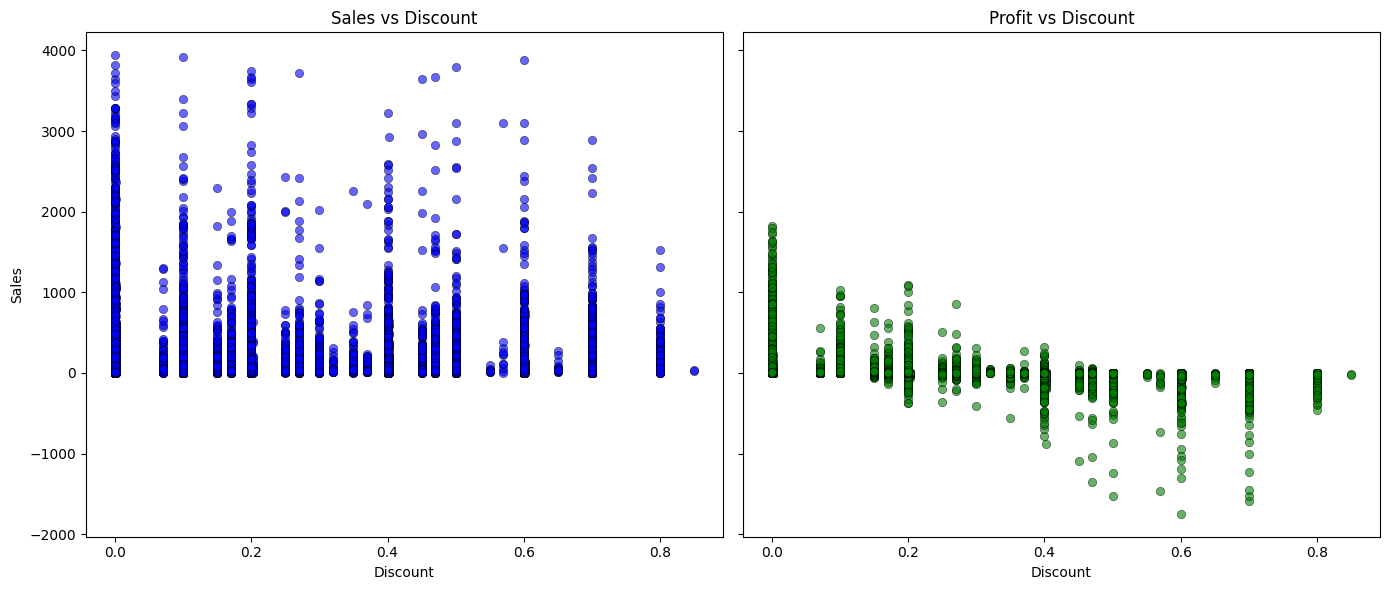

In [212]:
# Check the correlation between discount, sales and profit

# For Sales vs Discount and Profit vs Discount
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Discount vs Sales
sns.scatterplot(data=sheets_data, x="Discount", y="Sales", ax=axes[0], color="blue", edgecolor="black", alpha=0.6)
axes[0].set_title("Sales vs Discount")
axes[0].set_xlabel("Discount")
axes[0].set_ylabel("Sales")

# Discount vs Profit
sns.scatterplot(data=sheets_data, x="Discount", y="Profit", ax=axes[1], color="green", edgecolor="black", alpha=0.6)
axes[1].set_title("Profit vs Discount")
axes[1].set_xlabel("Discount")
axes[1].set_ylabel("Profit")

plt.tight_layout()
plt.show()

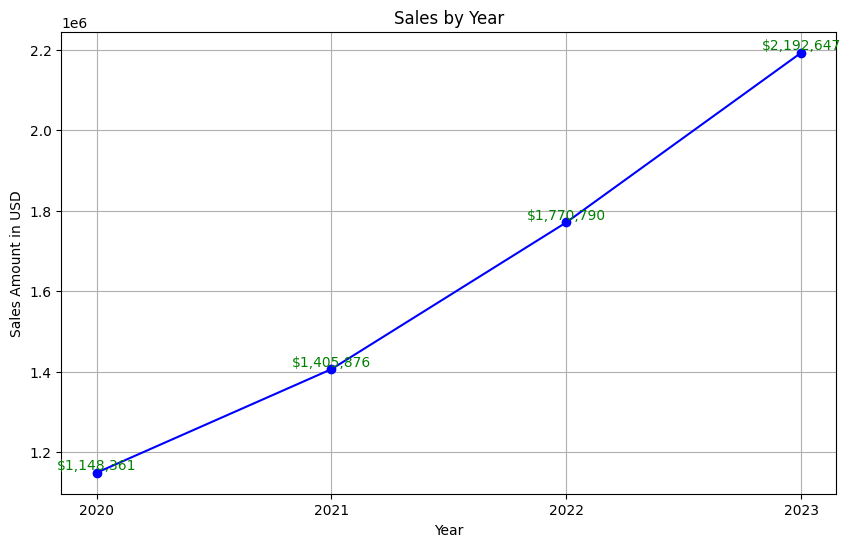

In [228]:
# Analyze the yearly and monthly trend of sales and profit

yearly_sales = sheets_data[["Order Year", "Sales"]].groupby("Order Year").sum().sort_values(by="Sales", ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales["Sales"], marker="o", color="b", linestyle="-")
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales Amount in USD")
plt.xticks(yearly_sales.index)
plt.grid(True)

for x, y in zip(yearly_sales.index, yearly_sales["Sales"]):
    plt.text(x, y, f"${y:,.0f}", ha="center", va="bottom", fontsize=10, color="green")
plt.show()

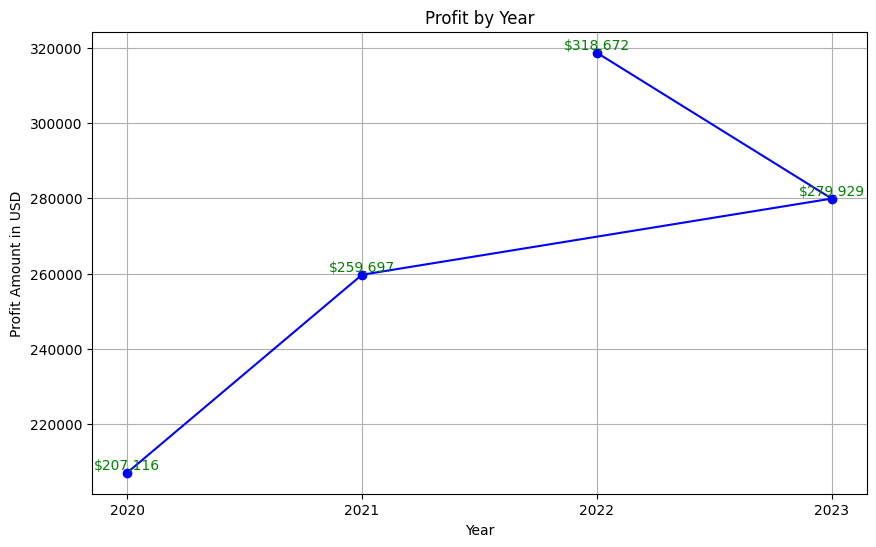

In [227]:
yearly_profit = sheets_data[["Order Year", "Profit"]].groupby("Order Year").sum().sort_values(by="Profit", ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(yearly_profit.index, yearly_profit["Profit"], marker="o", color="b", linestyle="-")
plt.title("Profit by Year")
plt.xlabel("Year")
plt.ylabel("Profit Amount in USD")
plt.xticks(yearly_profit.index)
plt.grid(True)

for x, y in zip(yearly_profit.index, yearly_profit["Profit"]):
    plt.text(x, y, f"${y:,.0f}", ha="center", va="bottom", fontsize=10, color="green")

plt.show()

In [229]:
sheets_data.to_excel("ecommerce_analysis_cleaned.xlsx", index=False)